<a href="https://colab.research.google.com/github/ThalesCavalcanti/MachineLearningGroundwork/blob/main/Parte_1_3_Classificac%CC%A7a%CC%83o_A%CC%81rvores_de_decisa%CC%83o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Reconecte ao Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
DRIVE_DIRECTORY = "curso_ml"
DRIVE_DIRECTORY = os.path.join("/content/drive/MyDrive/cursoML", DRIVE_DIRECTORY)

---

In [3]:
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix

# Árvores de decisão

Comece recuperando os dados preditores, de treino e de teste, a partir do arquivo `cover_type.pkl` salvo na pasta do Drive. Lembre-se de que você deve instanciar as variáveis `X` e `y`, dos splits `train` e `test`,  na mesma ordem que salvou.

In [8]:
with open(os.path.join(DRIVE_DIRECTORY, 'cover_type.pkl'), 'rb') as f:
    (X_train, y_train, X_test, y_test) = pickle.load(f)

Use o atributo `shape` para verificar quantas instâncias e quantos atributos têm cada uma dessas variáveis.

In [9]:
X_train.shape, y_train.shape

((7500, 53), (7500,))

In [10]:
X_test.shape, y_test.shape

((2500, 53), (2500,))

Instancie e treine um classificador da classe `DecisionTreeClassifier`. Use o parâmetro `criterion='gini'` (valor padrão) e `random_state=0`.

In [11]:
tree_classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Calcule e exiba as predições feitas no split de teste.

In [12]:
y_pred = tree_classifier.predict(X_test)

In [13]:
y_pred

array([4, 4, 1, ..., 6, 4, 5])

Calcule a acurácia do classificador.

In [14]:
accuracy_score(y_test, y_pred)

0.7172

Exiba a matriz de confusão.

0.7172

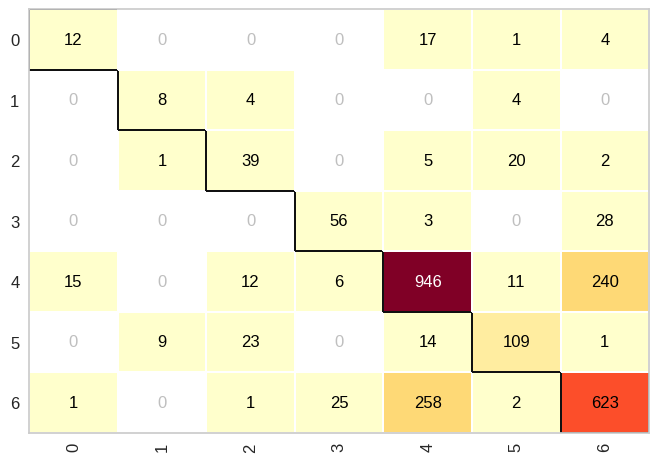

In [15]:
cm = ConfusionMatrix(tree_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Exiba o reporte de classificação.

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.35      0.39        34
           1       0.44      0.50      0.47        16
           2       0.49      0.58      0.53        67
           3       0.64      0.64      0.64        87
           4       0.76      0.77      0.77      1230
           5       0.74      0.70      0.72       156
           6       0.69      0.68      0.69       910

    accuracy                           0.72      2500
   macro avg       0.60      0.60      0.60      2500
weighted avg       0.72      0.72      0.72      2500



A árvore de decisão já ficou muito melhor que o classificador bayesiano.

Agora repita o exercício utilizando a classe `RandomForestClassifier`. Nós não vamos informar `n_estimators` (o algoritmo vai utilizar o valor padrão de 100), nem `criterion` (o padrão é Gini). Para garantir reprodutibilidade, informe `random_state=0`.

In [17]:
tree_classifier = RandomForestClassifier(random_state=0)
tree_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [18]:
y_pred = tree_classifier.predict(X_test)

In [19]:
y_pred

array([4, 4, 5, ..., 6, 6, 2])

In [20]:
accuracy_score(y_test, y_pred)

0.8064

0.8064

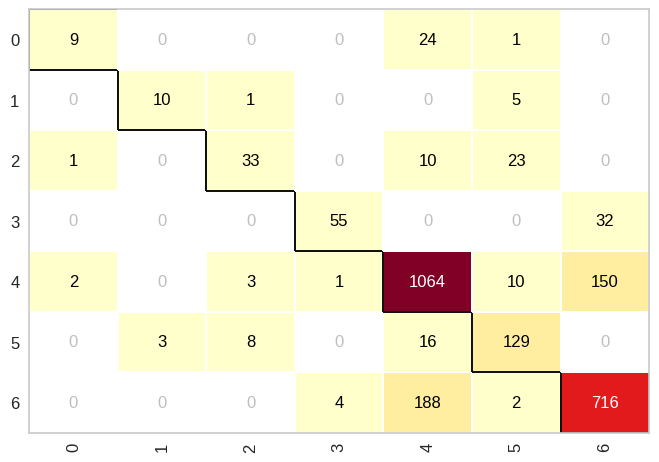

In [21]:
cm = ConfusionMatrix(tree_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.26      0.39        34
           1       0.77      0.62      0.69        16
           2       0.73      0.49      0.59        67
           3       0.92      0.63      0.75        87
           4       0.82      0.87      0.84      1230
           5       0.76      0.83      0.79       156
           6       0.80      0.79      0.79       910

    accuracy                           0.81      2500
   macro avg       0.79      0.64      0.69      2500
weighted avg       0.81      0.81      0.80      2500



---

**EXTRA**

[Consulte a documentação](https://scikit-learn.org/stable/api/sklearn.ensemble.html) e escolha um outro classificador do tipo *ensemble* para treinar. Observação: pode ser que nem todos os classificadores funcionem, pois eles podem ter restrições quanto ao formato dos dados apresentados.

Abaixo como exemplo está o `GradientBoostingClassifier`.

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
tree_classifier = GradientBoostingClassifier(random_state=0)
tree_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [26]:
y_pred = tree_classifier.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.7524

0.7524

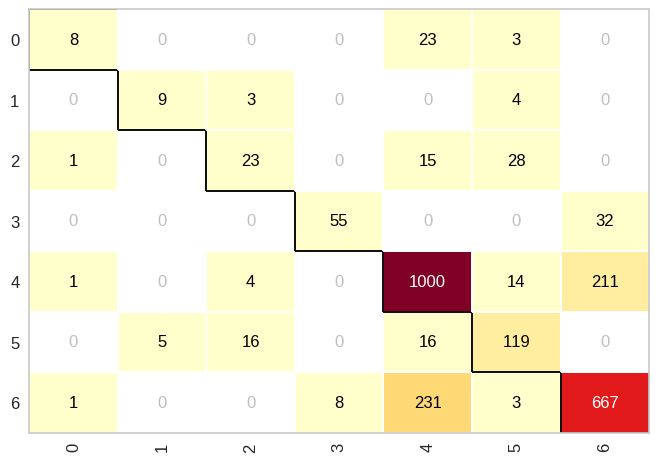

In [29]:
cm = ConfusionMatrix(tree_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.24      0.36        34
           1       0.64      0.56      0.60        16
           2       0.50      0.34      0.41        67
           3       0.87      0.63      0.73        87
           4       0.78      0.81      0.80      1230
           5       0.70      0.76      0.73       156
           6       0.73      0.73      0.73       910

    accuracy                           0.75      2500
   macro avg       0.71      0.58      0.62      2500
weighted avg       0.75      0.75      0.75      2500

